In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

载入数据

In [113]:
train_df = pd.read_csv('../../dataset/train.csv',header=0)
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [114]:
test_df = pd.read_csv('../../dataset/test.csv',header=0)
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


训练集有1460个样本，共81列，包括79个特征列、Id列、目标值列（SalePrice），特征列中有43个是类别型，36个是数值型。

In [115]:
print('train dataset shape:',train_df.shape)
print('train columns: \n',train_df.get_dtype_counts())

train dataset shape: (1460, 81)
train columns: 
 float64     3
int64      35
object     43
dtype: int64


测试集有1459个样本，共80列，包括79个特征列和Id列，特征列有43个类别型，36个数值型。

In [116]:
print('test dataset shape:',test_df.shape)
print('test columns: \n',test_df.get_dtype_counts())

test dataset shape: (1459, 80)
test columns: 
 float64    11
int64      26
object     43
dtype: int64


## 离群点剔除

使用热力图查看训练集数值型特征列和目标值列的相关系数。发现和SalePrice强相关的列有OverallQual、GrLivArea、TotalBsmtSF、1stFlrSF、GarageArea、GarageCars。另外在图中有两个很明显的深色正方块，可以看出GarageArea和GarageCars强相关，TotalBsmtSF和1stFlrSF强相关。

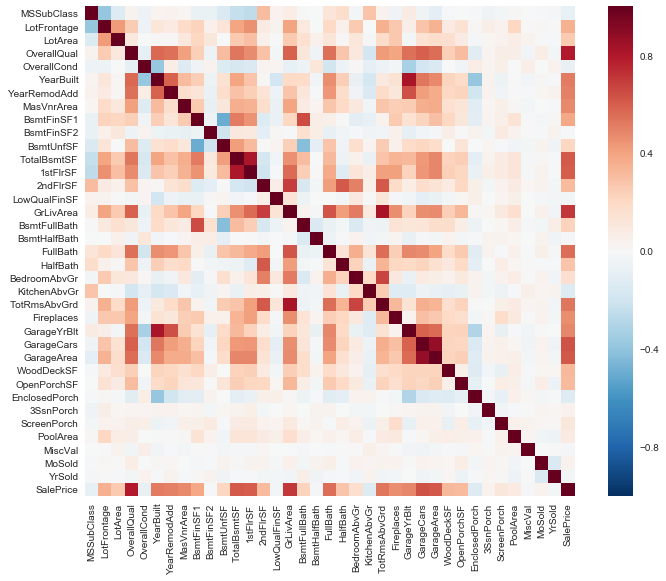

In [117]:
corr_data = train_df.iloc[:,1:].corr()
plt.subplots(figsize=(12,9))
sns.heatmap(data=corr_data,square=True)

画出GrLivArea和SalePrice的散点图，查看分布特性，SalePrice随着GrLivArea的增长而增长，但是有两个离群点，面积特别大，售价特别低，会影响建模的准确度，剔除。

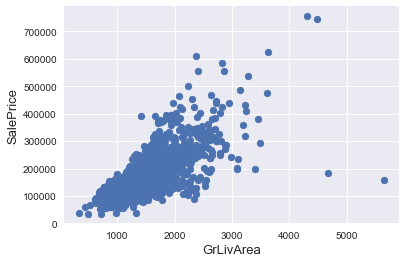

In [118]:
fig, ax = plt.subplots()
ax.scatter(x = train_df['GrLivArea'], y = train_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [119]:
train_df = train_df.drop(train_df[(train_df.GrLivArea>4000) & (train_df.SalePrice<200000)].index)
train_df.shape

(1458, 81)

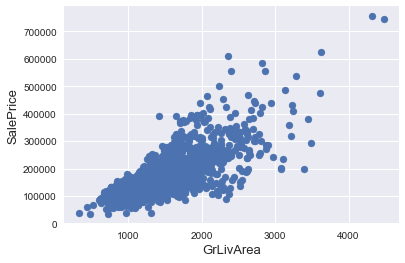

In [120]:
fig, ax = plt.subplots()
ax.scatter(x = train_df['GrLivArea'], y = train_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

## 异常值处理

GarageYrBlt的最大值是2207，显然是记录错误，修正为重新装修的时间

In [166]:
print( '\n GarageYrBlt min = {:.2f} and max = {:.2f}\n'.format(all_data.GarageYrBlt.min(), all_data.GarageYrBlt.max()))


 GarageYrBlt min = 0.00 and max = 2207.00



In [167]:
all_data[all_data.GarageYrBlt == 2207]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
2590,1564,0,0,None,2,1Fam,TA,Av,583.0,0.0,...,New,0,Pave,6,1546.0,AllPub,132,2006,2007,2007


In [168]:
all_data.loc[2590,['GarageYrBlt']] = 2007

In [169]:
print( '\n GarageYrBlt min = {:.2f} and max = {:.2f}\n'.format(all_data.GarageYrBlt.min(), all_data.GarageYrBlt.max()))


 GarageYrBlt min = 0.00 and max = 2010.00



## 缺失值处理

为了方便缺失值处理，将训练集数据和测试集数据合并在一起。查看每个特征列的缺失值分布。

In [121]:
train = train_df.copy()
test = test_df.copy()
ntrain = train.shape[0]
ntest = test.shape[0]
all_data = pd.concat((train,test)).reset_index(drop=True)
y_train = all_data[:ntrain]['SalePrice']
all_data = all_data.drop(['SalePrice'],axis=1)
all_data.shape

(2917, 80)

<Container object of 35 artists>

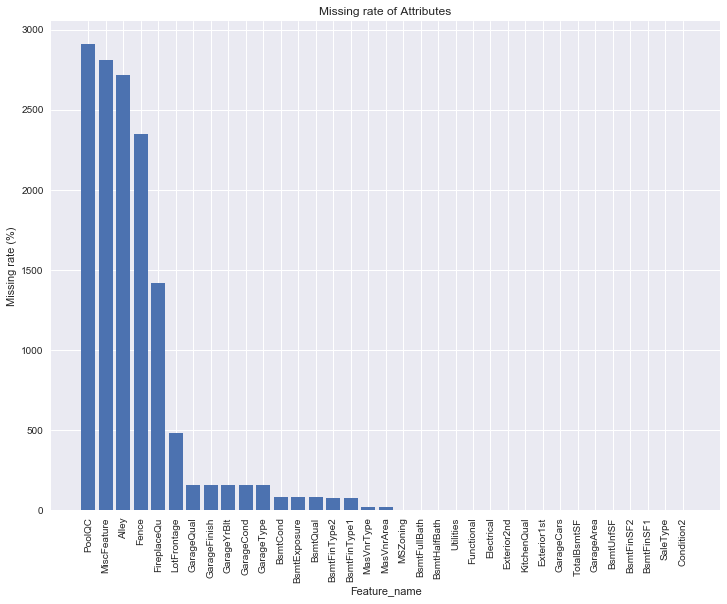

In [122]:
def countNullValueNum(d_series):
    return d_series.isnull().sum()
fig,ax = plt.subplots(figsize=(12,9))
count_Null_sorted = all_data.apply(countNullValueNum,axis=0).sort_values(ascending=False)
count_Null_sorted_x = count_Null_sorted.index[:35].values
count_Null_sorted_y = count_Null_sorted.values[:35]
ax = plt.subplot()
ax.set_xlabel('Feature_name')
ax.set_ylabel('Missing rate (%)')
ax.set_title('Missing rate of Attributes')
ax.set_xticklabels(count_Null_sorted_x,rotation='vertical')
ax.set_xticks(range(35))
ax.bar(range(35),count_Null_sorted_y)

In [123]:
#所有类别型特征的名称
print(all_data.select_dtypes(include=['object']).columns.values)

['Alley' 'BldgType' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2'
 'BsmtQual' 'CentralAir' 'Condition1' 'Condition2' 'Electrical' 'ExterCond'
 'ExterQual' 'Exterior1st' 'Exterior2nd' 'Fence' 'FireplaceQu' 'Foundation'
 'Functional' 'GarageCond' 'GarageFinish' 'GarageQual' 'GarageType'
 'Heating' 'HeatingQC' 'HouseStyle' 'KitchenQual' 'LandContour' 'LandSlope'
 'LotConfig' 'LotShape' 'MSZoning' 'MasVnrType' 'MiscFeature'
 'Neighborhood' 'PavedDrive' 'PoolQC' 'RoofMatl' 'RoofStyle'
 'SaleCondition' 'SaleType' 'Street' 'Utilities']


In [124]:
#所有数值型特征的名称
print(all_data.select_dtypes(exclude=['object']).columns.values)

['1stFlrSF' '2ndFlrSF' '3SsnPorch' 'BedroomAbvGr' 'BsmtFinSF1' 'BsmtFinSF2'
 'BsmtFullBath' 'BsmtHalfBath' 'BsmtUnfSF' 'EnclosedPorch' 'Fireplaces'
 'FullBath' 'GarageArea' 'GarageCars' 'GarageYrBlt' 'GrLivArea' 'HalfBath'
 'Id' 'KitchenAbvGr' 'LotArea' 'LotFrontage' 'LowQualFinSF' 'MSSubClass'
 'MasVnrArea' 'MiscVal' 'MoSold' 'OpenPorchSF' 'OverallCond' 'OverallQual'
 'PoolArea' 'ScreenPorch' 'TotRmsAbvGrd' 'TotalBsmtSF' 'WoodDeckSF'
 'YearBuilt' 'YearRemodAdd' 'YrSold']


PoolQC、MiscFeature、Alley、Fence、FireplaceQu、GarageCond、GarageQual、GarageFinish、GarageType、BsmtCond、BsmtExposure、BsmtFinType1、BsmtFinType2的缺失值表示‘没有’，

In [125]:
fill_none_cols = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu',
                  'GarageCond','GarageQual','GarageFinish','GarageType',
                 'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
                 'BsmtQual']
for col in fill_none_cols:
    all_data[col] = all_data[col].fillna('None')

LotFrontage表示离街道的距离，考虑使用周围邻居们的LotFrontage平均值来填充。

In [126]:
all_data.LotFrontage = all_data.groupby("Neighborhood").LotFrontage.transform(
    lambda x: x.fillna(x.median()))

GarageYrBlt为空是因为没有Garage，考虑使用0来填充。

In [127]:
all_data.GarageYrBlt = all_data.GarageYrBlt.fillna(0)

MasVnrType表示‘没有’，使用None填充，MasVnrArea使用0填充。

In [128]:
all_data.MasVnrType = all_data.MasVnrType.fillna('None')
all_data.MasVnrArea = all_data.MasVnrArea.fillna(0)

查看剩下含有缺失值的特征，发现index都大于ntrain,说明都是test集样本含有缺失值。

<Container object of 35 artists>

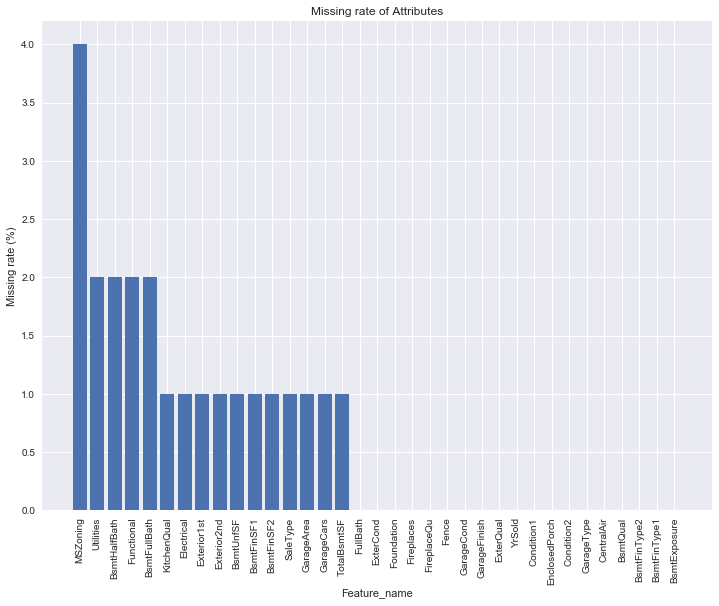

In [129]:
def countNullValueNum(d_series):
    return d_series.isnull().sum()
fig,ax = plt.subplots(figsize=(12,9))
count_Null_sorted = all_data.apply(countNullValueNum,axis=0).sort_values(ascending=False)
count_Null_sorted_x = count_Null_sorted.index[:35].values
count_Null_sorted_y = count_Null_sorted.values[:35]
ax = plt.subplot()
ax.set_xlabel('Feature_name')
ax.set_ylabel('Missing rate (%)')
ax.set_title('Missing rate of Attributes')
ax.set_xticklabels(count_Null_sorted_x,rotation='vertical')
ax.set_xticks(range(35))
ax.bar(range(35),count_Null_sorted_y)

In [130]:
for col in count_Null_sorted[:16].index.values:
    print(col,all_data[all_data[col].isnull()].index)

MSZoning Int64Index([1913, 2214, 2248, 2902], dtype='int64')
Utilities Int64Index([1913, 1943], dtype='int64')
BsmtHalfBath Int64Index([2118, 2186], dtype='int64')
Functional Int64Index([2214, 2471], dtype='int64')
BsmtFullBath Int64Index([2118, 2186], dtype='int64')
KitchenQual Int64Index([1553], dtype='int64')
Electrical Int64Index([1377], dtype='int64')
Exterior1st Int64Index([2149], dtype='int64')
Exterior2nd Int64Index([2149], dtype='int64')
BsmtUnfSF Int64Index([2118], dtype='int64')
BsmtFinSF1 Int64Index([2118], dtype='int64')
BsmtFinSF2 Int64Index([2118], dtype='int64')
SaleType Int64Index([2487], dtype='int64')
GarageArea Int64Index([2574], dtype='int64')
GarageCars Int64Index([2574], dtype='int64')
TotalBsmtSF Int64Index([2118], dtype='int64')


参考Neighborhood来填充MSZoning，可以发现在Neighborhood='IDOTRR'的样本，RM占比较多；在Neighborhood='Mitchel'的样本中RL占比特别大。所以2902填充RL,其他三个填充RM。

In [131]:
for d_index in all_data[all_data['MSZoning'].isnull()].index:
    print(all_data.loc[d_index,['Neighborhood']])

Neighborhood    IDOTRR
Name: 1913, dtype: object
Neighborhood    IDOTRR
Name: 2214, dtype: object
Neighborhood    IDOTRR
Name: 2248, dtype: object
Neighborhood    Mitchel
Name: 2902, dtype: object


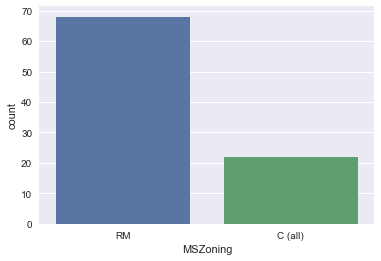

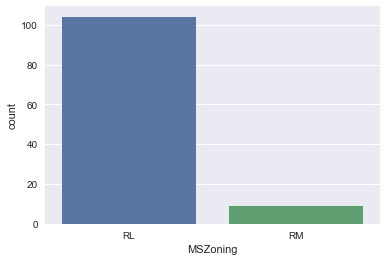

In [132]:
tmp_df = all_data[all_data.Neighborhood=='IDOTRR']
sns.countplot(x='MSZoning',data=tmp_df)
plt.show()

tmp_df = all_data[all_data.Neighborhood=='Mitchel']
sns.countplot(x='MSZoning',data=tmp_df)
plt.show()

del tmp_df

In [133]:
all_data.loc[2902,['MSZoning']] = 'RL'
all_data.loc[1913,['MSZoning']] = 'RM'
all_data.loc[2214,['MSZoning']] = 'RM'
all_data.loc[2248,['MSZoning']] = 'RM'

根据作图分析，OverallQual等于1的情况下，Functional都是Mod；OverallQual等于4的情况下Functional大部分是Typ。所以2214填充Mod，2471填充Typ。

In [134]:
for d_index in all_data[all_data['Functional'].isnull()].index:
    print(all_data.loc[d_index,['OverallQual']])

OverallQual    1
Name: 2214, dtype: object
OverallQual    4
Name: 2471, dtype: object


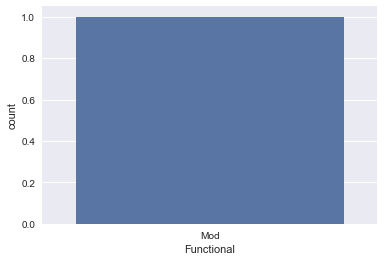

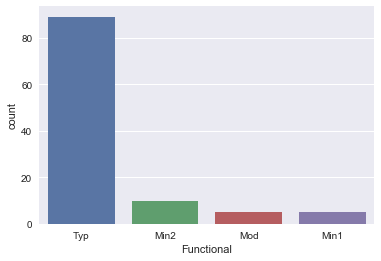

In [135]:
tmp_df = test[test.OverallQual == 1]
sns.countplot(x='Functional',data=tmp_df)
plt.show()

tmp_df = test[test.OverallQual == 4]
sns.countplot(x='Functional',data=tmp_df)
plt.show()

del tmp_df

In [136]:
all_data.loc[2214,['Functional']] = 'Mod'
all_data.loc[2471,['Functional']] = 'Typ'

查看Utilities的取值分布，只有一个样本是NoSeWa，所以使用AllPub填充缺失值。

In [137]:
all_data.Utilities.value_counts()

AllPub    2914
NoSeWa       1
Name: Utilities, dtype: int64

In [138]:
all_data.Utilities = all_data.Utilities.fillna('AllPub')

查看Bsmt相关的属性列，发现都是‘没有’地下室,使用0填充BsmtFullBath、BsmtHalfBath、BsmtFinSF1、BsmtFinSF2、BsmtUnfSF、TotalBsmtSF中的缺失值。

In [140]:
bsmt_cols = ['BsmtFullBath','BsmtHalfBath','BsmtQual',
             'BsmtCond','BsmtExposure','BsmtFinType1',
            'BsmtFinSF1','BsmtFinType2','BsmtFinSF2',
            'BsmtUnfSF','TotalBsmtSF']
all_data[all_data.BsmtFullBath.isnull()][bsmt_cols]

,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
2118,NaN,NaN,None,None,None,None,NaN,None,NaN,NaN,NaN
2186,NaN,NaN,None,None,None,None,0.0,None,0.0,0.0,0.0


In [141]:
fill_na_cols = ['BsmtFullBath','BsmtHalfBath',
            'BsmtFinSF1','BsmtFinSF2',
            'BsmtUnfSF','TotalBsmtSF']
for col in fill_na_cols:
    all_data[col] = all_data[col].fillna(0)
del bsmt_cols, fill_na_cols

参考SaleCondition填充SaleType，SaleCondition为Normal的样本中，SaleType等于'WD'的占大多数，所以填充'WD'。

In [142]:
all_data[all_data.SaleType.isnull()]['SaleCondition']

2487    Normal
Name: SaleCondition, dtype: object

In [143]:
all_data[all_data['SaleCondition']=='Normal']['SaleType'].value_counts()

WD       2314
COD        39
ConLD      21
CWD        10
ConLw       7
ConLI       5
Con         4
Oth         1
Name: SaleType, dtype: int64

In [144]:
all_data.loc[2487,['SaleType']] = 'WD'

KitchenQual参考其他装修的规格，都处于中等水平，所以填写'TA'

In [145]:
all_data[all_data.KitchenQual.isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
1553,725,499,0,None,3,1Fam,Fa,No,0.0,0.0,...,COD,0,Pave,6,689.0,AllPub,0,1917,1950,2010


In [146]:
all_data.loc[1553,['ExterQual','OverallQual','GarageQual','FireplaceQu','HeatingQC']]

ExterQual        TA
OverallQual       5
GarageQual       Fa
FireplaceQu    None
HeatingQC        Gd
Name: 1553, dtype: object

In [147]:
all_data.loc[1553,['KitchenQual']] = 'TA'

Electrical的值，绝大部分在SBrkr，考虑使用SBrkr来填充

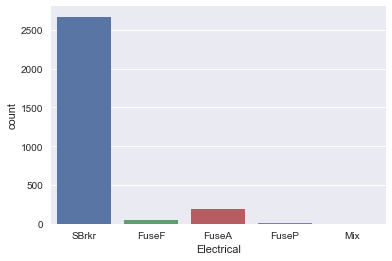

In [148]:
sns.countplot(x='Electrical',data=all_data)
plt.show()

In [149]:
all_data.Electrical.fillna('SBrkr',inplace=True)

GarageCars、GarageArea为空,但是GarageType为Detchd，分别查看Detchd类别中Garage每个属性的分布

In [150]:
garage_cols = ['GarageFinish','GarageCars','GarageArea',
               'GarageType','GarageCond','GarageQual','GarageYrBlt']
all_data[all_data.GarageArea.isnull()][garage_cols]

,GarageFinish,GarageCars,GarageArea,GarageType,GarageCond,GarageQual,GarageYrBlt
2574,None,NaN,NaN,Detchd,None,None,0.0


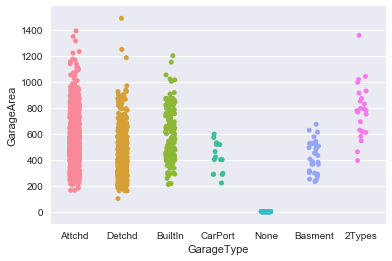

In [151]:
sns.stripplot(x='GarageType',y='GarageArea',data=all_data,jitter=True)

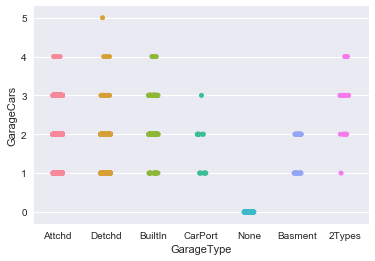

In [152]:
sns.stripplot(x='GarageType',y='GarageCars',data=all_data,jitter=True)

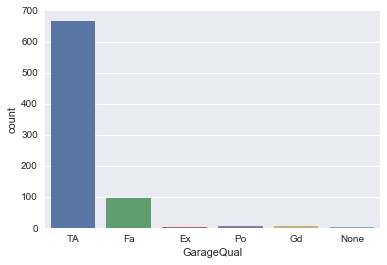

In [153]:
all_data_ga = all_data[all_data.GarageType == 'Detchd']
sns.countplot(x='GarageQual',data=all_data_ga)

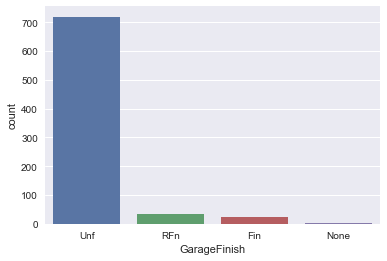

In [154]:
all_data_ga = all_data[all_data.GarageType == 'Detchd']
sns.countplot(x='GarageFinish',data=all_data_ga)

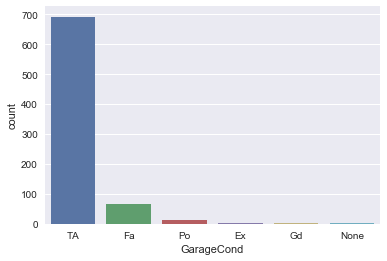

In [155]:
all_data_ga = all_data[all_data.GarageType == 'Detchd']
sns.countplot(x='GarageCond',data=all_data_ga)

In [156]:
all_data[all_data.GarageArea.isnull()]['OverallQual']

2574    5
Name: OverallQual, dtype: int64

In [157]:
all_data[all_data.GarageArea.isnull()][['YearBuilt','YearRemodAdd']]

,YearBuilt,YearRemodAdd
2574,1923,1999


GarageArea、GarageCars使用中值来填充，GarageFinish使用Unf填充，GarageCond、GarageQual使用TA来填充，'GarageYrBlt'使用房屋重修年代填充。

In [158]:
area_median = all_data[all_data.GarageType=='Detchd']['GarageArea'].median()
cars_median = all_data[all_data.GarageType=='Detchd']['GarageCars'].median()
all_data.loc[2574,['GarageArea']] = area_median
all_data.loc[2574,['GarageCars']] = cars_median
all_data.loc[2574,['GarageFinish']] = 'Unf'
all_data.loc[2574,['GarageCond']] = 'TA'
all_data.loc[2574,['GarageQual']] = 'TA'
all_data.loc[2574,['GarageYrBlt']] = 1999

Exterior1st、Exterior2nd这两个特征列没有找到什么规律，使用最多的类型值来填充

In [159]:
all_data.Exterior1st.value_counts().index[0]

'VinylSd'

In [160]:
all_data.Exterior2nd.value_counts().index[0]

'VinylSd'

In [161]:
all_data.Exterior1st.fillna('VinylSd',inplace=True)
all_data.Exterior2nd.fillna('VinylSd',inplace=True)

<Container object of 35 artists>

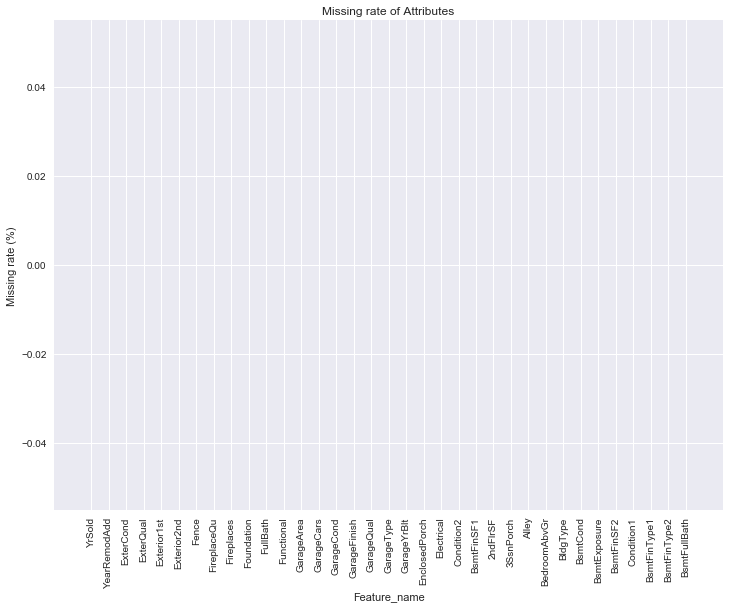

In [162]:
def countNullValueNum(d_series):
    return d_series.isnull().sum()
fig,ax = plt.subplots(figsize=(12,9))
count_Null_sorted = all_data.apply(countNullValueNum,axis=0).sort_values(ascending=False)
count_Null_sorted_x = count_Null_sorted.index[:35].values
count_Null_sorted_y = count_Null_sorted.values[:35]
ax = plt.subplot()
ax.set_xlabel('Feature_name')
ax.set_ylabel('Missing rate (%)')
ax.set_title('Missing rate of Attributes')
ax.set_xticklabels(count_Null_sorted_x,rotation='vertical')
ax.set_xticks(range(35))
ax.bar(range(35),count_Null_sorted_y)

到目前为止所有特征缺失值处理完毕，输出到文件。

In [171]:
train = all_data[:ntrain].join(y_train)
test = all_data[ntrain:]
train.to_csv('./1-train-preprocess-outlier-nan.csv',index=False)
test.to_csv('./1-test-preprocess-outlier-nan.csv',index=False)